<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')

In [2]:
# Utilice este espacio para escribir el código.
dataset = pd.read_csv('./data/datos_clientes.csv')
dataset.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


Se cargan los datos correspondientes al archivo `datos_clients.csv` y se imprimien las primeras 5 filas del df

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_Cliente     200 non-null    int64  
 1   Genero         200 non-null    object 
 2   Edad           200 non-null    int64  
 3   Ingreso        200 non-null    float64
 4   Puntaje_Gasto  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [14]:
dataset[['Edad', 'Ingreso', 'Puntaje_Gasto']].describe()

,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000
mean,38.850000,60624.446600,50.200000
std,13.969007,26262.903416,25.823522
min,18.000000,13458.020000,1.000000
25%,28.750000,41512.787500,34.750000
50%,36.000000,60777.960000,50.000000
75%,49.000000,77143.865000,73.000000
max,70.000000,138584.520000,99.000000


In [6]:
dataset['Genero'].value_counts()

Genero
Mujer     112
Hombre     88
Name: count, dtype: int64

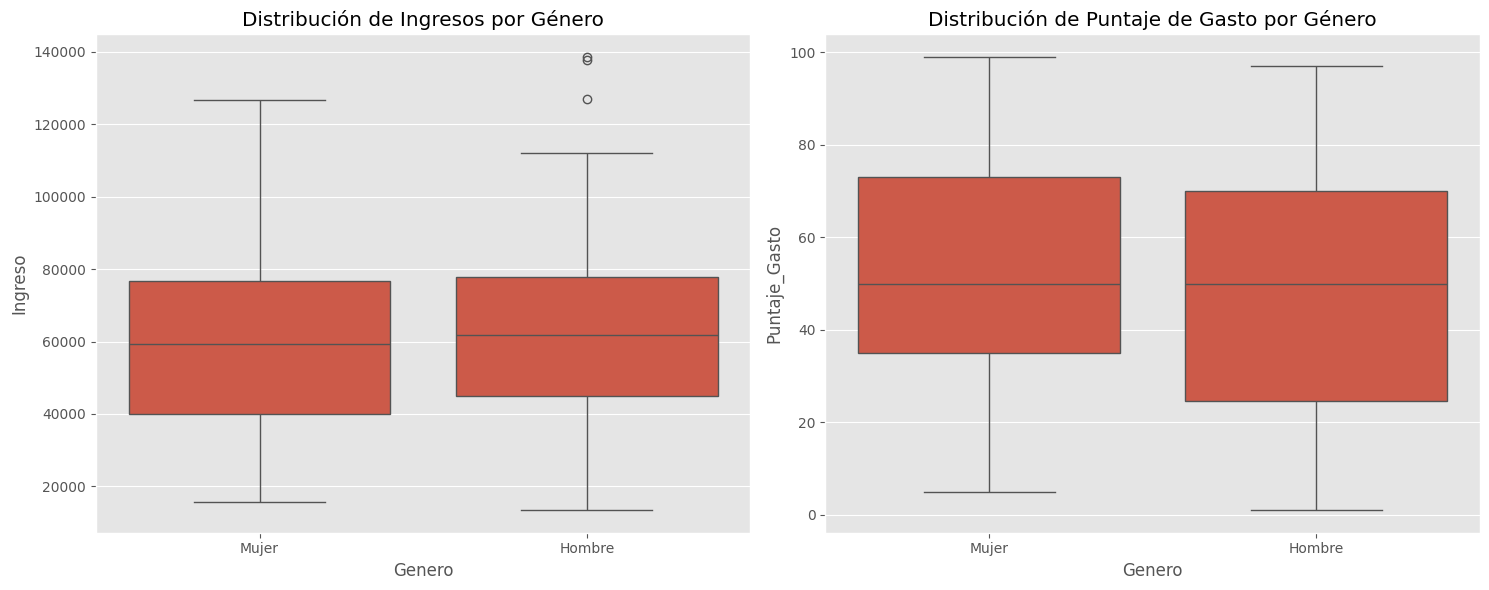

ANOVA para Ingresos por Género: F=0.5128711768717724, p=0.4747423582005452
ANOVA para Puntaje de Gasto por Género: F=0.6708370300325195, p=0.41374465898524204


In [15]:
# Gráfica de Distribuciones por Género
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Ingresos por Género
sns.boxplot(ax=axes[0], x='Genero', y='Ingreso', data=dataset)
axes[0].set_title('Distribución de Ingresos por Género')

# Puntaje de Gasto por Género
sns.boxplot(ax=axes[1], x='Genero', y='Puntaje_Gasto', data=dataset)
axes[1].set_title('Distribución de Puntaje de Gasto por Género')

plt.tight_layout()
plt.show()

# Pruebas ANOVA 
# Ingresos por género
anova_ingreso = stats.f_oneway(dataset[dataset['Genero'] == 'Hombre']['Ingreso'],
                               dataset[dataset['Genero'] == 'Mujer']['Ingreso'])

print(f"ANOVA para Ingresos por Género: F={anova_ingreso.statistic}, p={anova_ingreso.pvalue}")

# Puntaje de gasto por género
anova_gasto = stats.f_oneway(dataset[dataset['Genero'] == 'Hombre']['Puntaje_Gasto'],
                             dataset[dataset['Genero'] == 'Mujer']['Puntaje_Gasto'])
print(f"ANOVA para Puntaje de Gasto por Género: F={anova_gasto.statistic}, p={anova_gasto.pvalue}")

**Ingresos por Género**: El valor p es 0.475, que es mayor que el umbral típico de significancia (0.05). Esto significa que no hay evidencia estadísticamente significativa para rechazar la hipótesis nula. En otras palabras, no se encontró una diferencia significativa en los ingresos entre hombres y mujeres en este conjunto de datos.

**Puntaje de Gasto por Género**: El valor p es 0.414, también mayor que 0.05, lo que indica que no hay evidencia suficiente para afirmar que existe una diferencia significativa en el puntaje de gasto entre hombres y mujeres.

Debido a que no hay diferencias significativas entre hombres y mujeres en términos de ingresos o puntajes de gasto, la estrategia de marketing no debería centrarse exclusivamente en la variable de género. Por el contrario, podrías considerar otras variables, como el grupo etario, el comportamiento de compra o una combinación de variables, que pueden tener un mayor impacto y segmentar de manera más efectiva a los clientes.

ANOVA para Ingresos por Grupo Etario: F=4.638160445264849, p=0.0005070432135444014
ANOVA para Puntaje de Gasto por Grupo Etario: F=10.18290017857137, p=1.119516246036953e-08

ANOVA de dos vías para Ingresos por Grupo Etario y Género
                               sum_sq     df         F    PR(>F)
C(Grupo_Etario)             21.849336    5.0  4.706363  0.000450
C(Genero)                    1.010815    1.0  1.088651  0.298110
C(Grupo_Etario):C(Genero)    3.075606    5.0  0.662488  0.652361
Residual                   174.558345  188.0       NaN       NaN

ANOVA de dos vías para Puntaje de Gasto por Grupo Etario y Género
                               sum_sq     df         F        PR(>F)
C(Grupo_Etario)             41.578292    5.0  9.961753  1.808445e-08
C(Genero)                    0.676250    1.0  0.810115  3.692378e-01
C(Grupo_Etario):C(Genero)    0.811772    5.0  0.194493  9.643467e-01
Residual                   156.934610  188.0       NaN           NaN


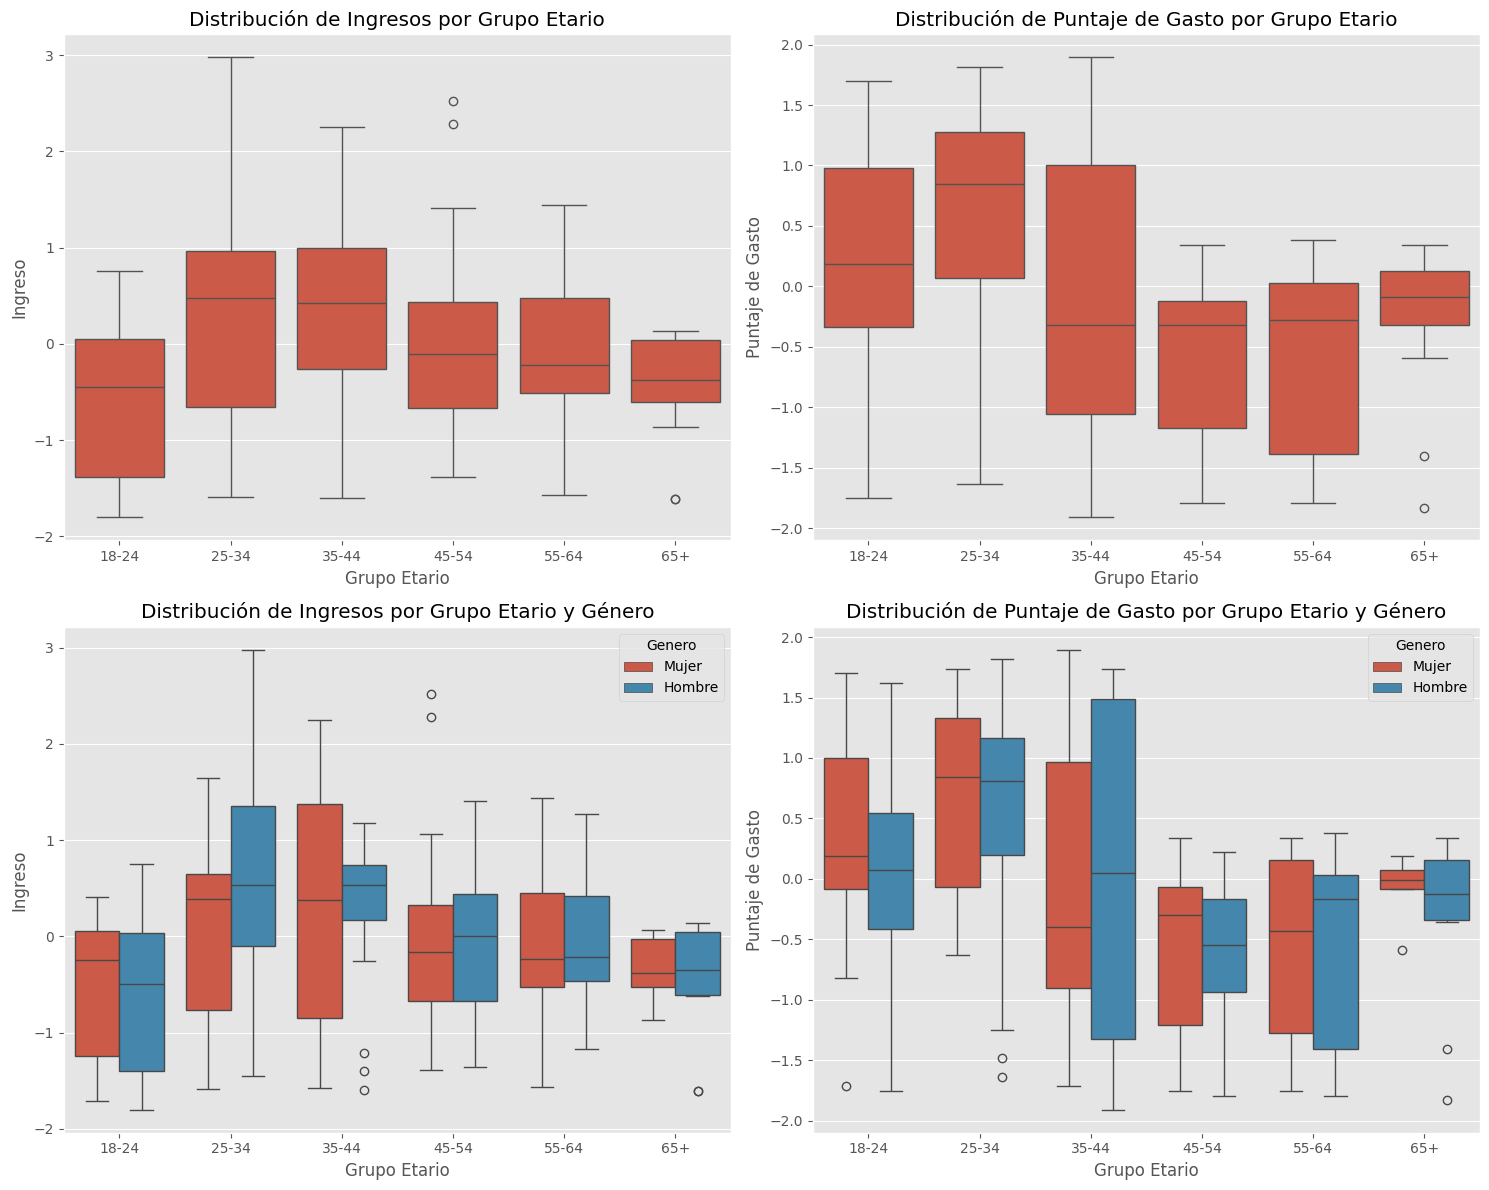

In [118]:
# Definir grupos etarios
bins = [18, 24, 34, 44, 54, 64, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
dataset['Grupo_Etario'] = pd.cut(dataset['Edad'], bins=bins, labels=labels, right=False)

# ANOVA de una vía para Ingresos por Grupo Etario
anova_ingreso_etario = stats.f_oneway(
    *[dataset[dataset['Grupo_Etario'] == grupo]['Ingreso'] for grupo in labels]
)
print(f"ANOVA para Ingresos por Grupo Etario: F={anova_ingreso_etario.statistic}, p={anova_ingreso_etario.pvalue}")

# ANOVA de una vía para Puntaje de Gasto por Grupo Etario
anova_gasto_etario = stats.f_oneway(
    *[dataset[dataset['Grupo_Etario'] == grupo]['Puntaje_Gasto'] for grupo in labels]
)
print(f"ANOVA para Puntaje de Gasto por Grupo Etario: F={anova_gasto_etario.statistic}, p={anova_gasto_etario.pvalue}")

# ANOVA de dos vías para Ingresos por Grupo Etario y Género
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo para Ingresos
model_ingreso = ols('Ingreso ~ C(Grupo_Etario) + C(Genero) + C(Grupo_Etario):C(Genero)', data=dataset).fit()
anova_ingreso = sm.stats.anova_lm(model_ingreso, typ=2)
print("\nANOVA de dos vías para Ingresos por Grupo Etario y Género")
print(anova_ingreso)

# Modelo para Puntaje de Gasto
model_gasto = ols('Puntaje_Gasto ~ C(Grupo_Etario) + C(Genero) + C(Grupo_Etario):C(Genero)', data=dataset).fit()
anova_gasto = sm.stats.anova_lm(model_gasto, typ=2)
print("\nANOVA de dos vías para Puntaje de Gasto por Grupo Etario y Género")
print(anova_gasto)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot de Ingresos por Grupo Etario
sns.boxplot(ax=axes[0,0], x='Grupo_Etario', y='Ingreso', data=dataset)
axes[0,0].set_title('Distribución de Ingresos por Grupo Etario')
axes[0,0].set_xlabel('Grupo Etario')
axes[0,0].set_ylabel('Ingreso')

# Boxplot de Puntaje de Gasto por Grupo Etario
sns.boxplot(ax=axes[0,1], x='Grupo_Etario', y='Puntaje_Gasto', data=dataset)
axes[0,1].set_title('Distribución de Puntaje de Gasto por Grupo Etario')
axes[0,1].set_xlabel('Grupo Etario')
axes[0,1].set_ylabel('Puntaje de Gasto')

# Boxplot de Ingresos por Grupo Etario
sns.boxplot(ax=axes[1,0], x='Grupo_Etario', y='Ingreso', hue='Genero', data=dataset)
axes[1,0].set_title('Distribución de Ingresos por Grupo Etario y Género')
axes[1,0].set_xlabel('Grupo Etario')
axes[1,0].set_ylabel('Ingreso')

# Boxplot de Puntaje de Gasto por Grupo Etario
sns.boxplot(ax=axes[1,1], x='Grupo_Etario', y='Puntaje_Gasto', hue='Genero', data=dataset)
axes[1,1].set_title('Distribución de Puntaje de Gasto por Grupo Etario y Género')
axes[1,1].set_xlabel('Grupo Etario')
axes[1,1].set_ylabel('Puntaje de Gasto')

plt.tight_layout()
plt.show()

**Ingresos por Grupo Etario**: El valor p es menor que 0.05, lo que indica que hay diferencias significativas en los ingresos entre los diferentes grupos etarios. Esto sugiere que la edad (o grupo etario) tiene un impacto significativo en los ingresos de los clientes. No hay una interacción significativa entre el grupo etario y el género. Esto significa que el efecto del grupo etario en los ingresos es independiente del género.

**Puntaje de Gasto por Grupo Etario**: De nuevo, el valor p es mucho menor que 0.05, lo que indica diferencias significativas en el puntaje de gasto entre los diferentes grupos etarios. Esto sugiere que el grupo etario también influye en la frecuencia o intensidad de las compras en la tienda. No hay una interacción significativa entre el grupo etario y el género en relación al puntaje de gasto, lo que indica que el efecto del grupo etario sobre el puntaje de gasto es independiente del género.

El grupo etario tiene un impacto significativo tanto en el puntaje de gasto como en los ingresos, por lo que es un factor importante a tener en cuenta cuando se trata de segmentar el marketing. Esto implica que la edad de los clientes debe ser un componente importante de la estrategia de marketing, con campañas específicas dirigidas a diferentes grupos etarios. 

Parece que el género no tiene un impacto significativo tanto en los ingresos como en el puntaje de gasto. Esto significa que enfocar las campañas de marketing exclusivamente en el género no sería efectivo.

Si se determina que son los más rentables, enfoque recursos y estrategias en los grupos etarios que muestran mayor potencial en ingresos y puntaje de gasto, como los segmentos 25-34 y 35-44.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

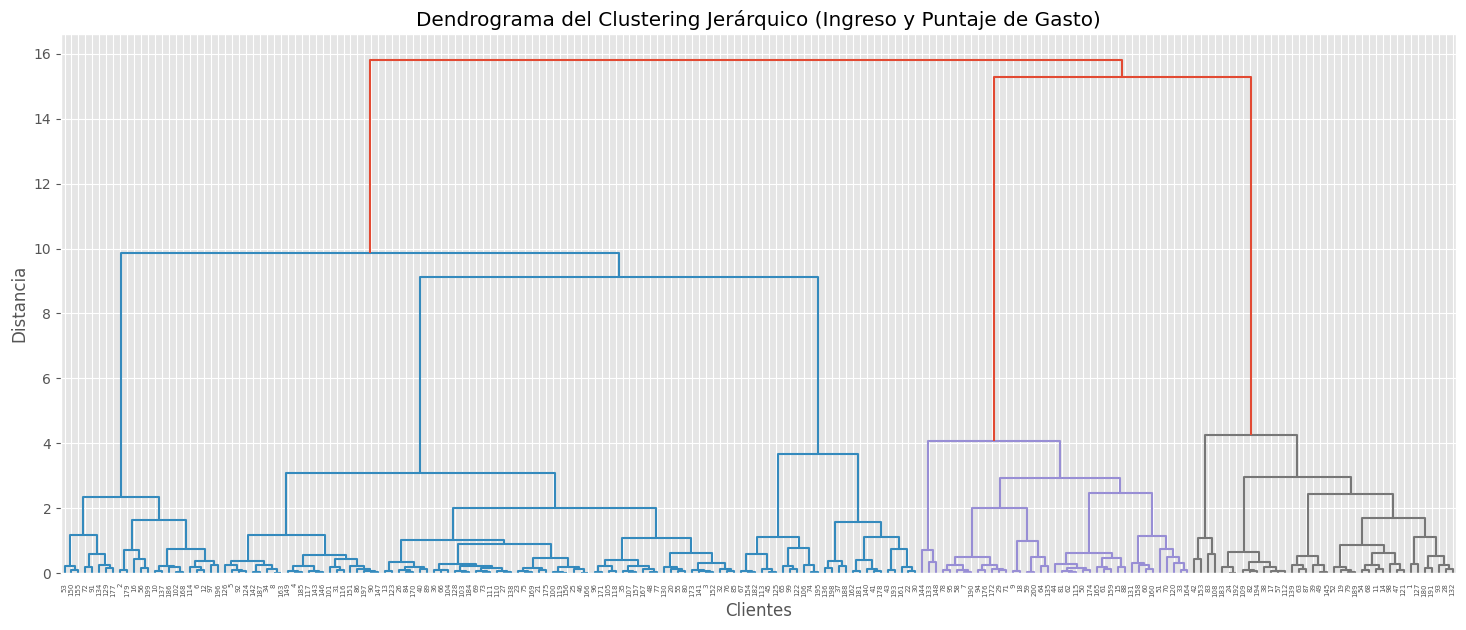

In [53]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Retener las variables 'Ingreso' y 'Puntaje_Gasto'
data = dataset[['Ingreso', 'Puntaje_Gasto']]

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
dist = pdist(data_scaled, metric='euclidean')

# Construir el dendrograma usando el método de enlace 'ward'
linked = linkage(dist, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(18, 7))
dendrogram(linked, labels=dataset['Id_Cliente'].values)
plt.title('Dendrograma del Clustering Jerárquico (Ingreso y Puntaje de Gasto)')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

Cuando se utilizan algoritmos de clasificación, la estandarización de los datos es crucial, especialmente aquellos basados en la distancia, como el clasificación jerárquica. La principal razón es que las variables pueden tener diferentes escalas. Por ejemplo, los ingresos en este caso podrían estar en un rango de miles o millones, mientras que los gastos podrían estar en un rango de 0 a 100.

Si los datos no se estandarizan, la variable con el rango más amplio (como los ingresos) será la que domine el cálculo de las distancias, lo que puede resultar en resultados de grupo sesgados. Asegurando que cada variable contribuya de manera equitativa al cálculo de la distancia y, en consecuencia, al proceso de agrupación, la estandarización transforma las variables para que tengan una media de 0 y una desviación estándar de 1.

Como resultado de esta igualdad en la contribución de las variables, el dendrograma puede mostrar las relaciones entre los clientes en función de sus ingresos y patrones de gasto de manera más precisa, sin que ninguna de las dos variables domine injustamente el proceso de agrupación.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Número de clusters: 5


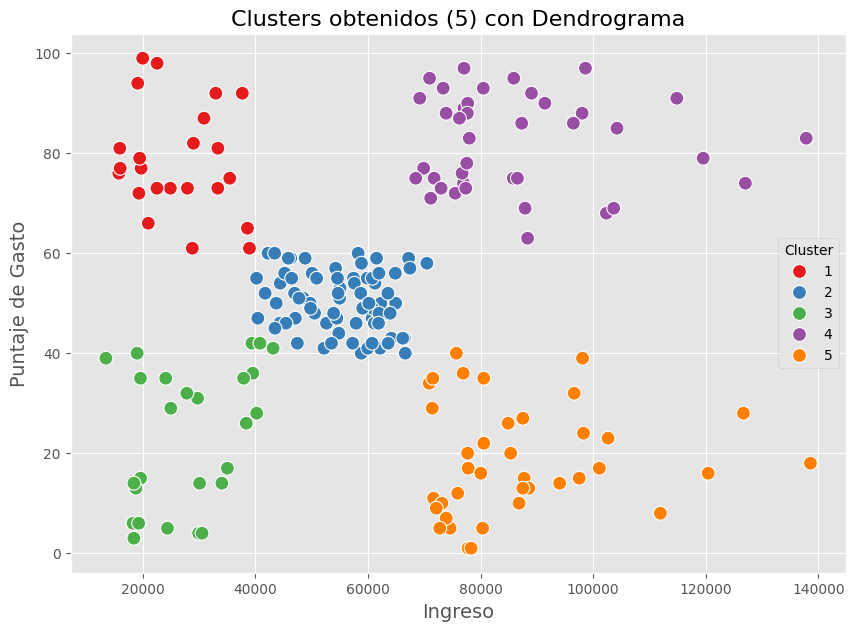

In [46]:
from scipy.cluster.hierarchy import fcluster

# Distancia máxima para cortar el dendrograma en 6
max_dist = 6

# Obtener los clusters cortando el dendrograma a la distancia especificada
clusters = fcluster(linked, max_dist, criterion='distance')

# Contar el número de clusters únicos obtenidos
num_clusters = len(set(clusters))
print(f'Número de clusters: {num_clusters}')

# Añadir los clusters obtenidos al dataset
dataset['Cluster'] = clusters

# Crear un gráfico de dispersión (scatter plot) coloreado por clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Ingreso', y='Puntaje_Gasto', hue='Cluster', palette='Set1', data=dataset, s=100)

# Configurar título y etiquetas
plt.title(f'Clusters obtenidos ({num_clusters}) con Dendrograma', fontsize=16)
plt.xlabel('Ingreso', fontsize=14)
plt.ylabel('Puntaje de Gasto', fontsize=14)

# Mostrar la gráfica
plt.show()

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

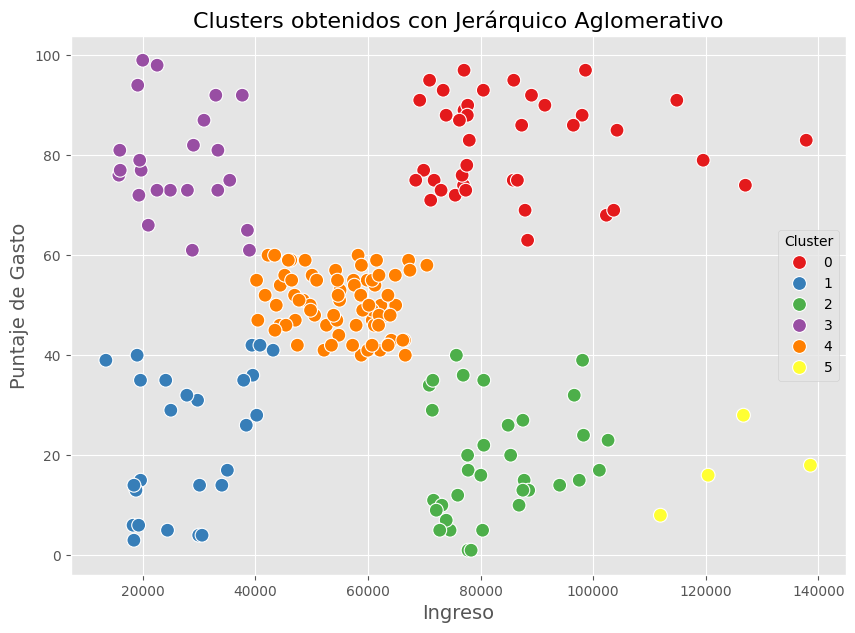

Ingreso                           Puntaje_Gasto         \
                  mean      median           std          mean median   
Cluster                                                                 
0         86537.496410   77996.300  16684.184918     82.128205   83.0   
1         28274.667308   28787.940   8998.503308     23.307692   27.0   
2         82660.580882   80206.195   9684.901266     18.764706   16.5   
3         26230.419565   24905.790   7742.413865     78.565217   77.0   
4         55451.258514   57359.505   7847.567060     50.216216   50.0   
5        124408.270000  123553.040  11216.846570     17.500000   17.0   

                   Count  
               std count  
Cluster                   
0         9.364489    39  
1        13.959281    26  
2        11.281679    34  
3        10.953729    23  
4         5.871385    74  
5         8.225975     4

In [66]:
from sklearn.cluster import AgglomerativeClustering

# Retener las variables 'Ingreso' y 'Puntaje_Gasto'
data = dataset[['Ingreso', 'Puntaje_Gasto']]

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

cluster_sk = AgglomerativeClustering(n_clusters=max_dist, metric='euclidean', linkage='ward')
cluster_sk = cluster_sk.fit_predict(data_scaled)

# Añadir los clusters obtenidos al dataset
dataset['Cluster'] = cluster_sk

# Crear un gráfico de dispersión (scatter plot) coloreado por clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Ingreso', y='Puntaje_Gasto', hue='Cluster', palette='Set1', data=dataset, s=100)

# Configurar título y etiquetas
plt.title(f'Clusters obtenidos con Jerárquico Aglomerativo', fontsize=16)
plt.xlabel('Ingreso', fontsize=14)
plt.ylabel('Puntaje de Gasto', fontsize=14)

# Mostrar la gráfica
plt.show()

# Descripción de los grupos encontrados
cluster_summary = dataset.groupby('Cluster').agg({
    'Ingreso': ['mean', 'median', 'std'],
    'Puntaje_Gasto': ['mean', 'median', 'std'],
    'Id_Cliente': 'count'
}).rename(columns={'Id_Cliente': 'Count'})

display(cluster_summary)


### Cluster 0 (Rojo)
Este grupo se distingue por tener clientes con altos ingresos, que oscilan entre 70,000 y 140,000, y un alto puntaje de gasto, que oscila entre 60 y 100. Estos clientes son los más valiosos para la tienda porque tienen un alto poder adquisitivo y son compradores frecuentes o realizan compras de alto valor. Según sus preferencias y expectativas, la estrategia de marketing debe enfocarse en ofrecerles programas de lealtad exclusivos, promociones personalizadas, servicios VIP y productos de gama alta. Es fundamental invertir en este grupo para mantener su lealtad y maximizar los ingresos.

### Cluster 1 (Azul Oscuro)
Este grupo incluye clientes con ingresos bajos y puntajes de gasto bajos a moderados (de 0 a 40). Estos clientes no tienen mucho dinero y no compran mucho. Debido a sus características, este grupo puede no ser una prioridad para campañas de marketing costosas. Sin embargo, para captar su atención sin invertir demasiados recursos, estrategias de bajo costo, como promociones genéricas o campañas de marketing masivo, podrían ser más apropiadas.

### Cluster 2 (Verde)
Los clientes de este grupo tienen ingresos medios de entre 60,000 y 90,000 dólares y puntajes de gasto moderados de entre 20 y 60 dólares. Su comportamiento de compra es relativamente modesto, a pesar de que tienen un poder adquisitivo razonable. Este grupo tiene la oportunidad de aumentar el ticket promedio o la frecuencia de compra a través de campañas que destacan la relación calidad-precio, las ofertas por volumen o los incentivos para compras más frecuentes. Sin embargo, si se busca un alto retorno de la inversión, no deben ser el foco principal.

### Cluster 3 (Morado)
A pesar de que los clientes tienen ingresos bajos, que oscilan entre 20,000 y 40,000, este grupo es particularmente interesante porque tiene un puntaje de gasto alto, que oscila entre 60 y 100. Aunque tienen limitaciones financieras, son compradores frecuentes o intensivos, lo que los convierte en un grupo valioso para la tienda. Las estrategias de marketing deberían enfocarse en ofrecerles descuentos, programas de recompensas y ofertas exclusivas para que sigan gastando mucho. Los programas de lealtad personalizados para este grupo podrían ser muy beneficiosos.

### Cluster 4 (Amarillo)
Este grupo tiene clientes con ingresos altos (entre 80,000 y 140,000) pero bajos gastos (menos de 20. Aunque tienen mucho dinero, no gastan mucho en la tienda. Este comportamiento puede indicar que la persona no está interesada en los productos o en la tienda. Para este grupo, las tácticas podrían enfocarse en despertar su interés a través de ofertas exclusivas, incentivos o comunicaciones personalizadas. Sin embargo, debido a la incertidumbre sobre su disposición a gastar más, estas estrategias deben diseñarse y monitorearse cuidadosamente.

### Cluster 5 (Naranja)
Este grupo tiene clientes con ingresos de bajos a medios, de treinta mil a sesenta mil, y un puntaje de gasto de moderado a alto, de cuarenta a setenta. Este grupo tiene un comportamiento de compra significativo y está muy comprometido con la tienda. Las estrategias de marketing deberían enfocarse en mantener y aumentar este compromiso mediante ofertas por volumen, promociones combinadas y comunicación constante que resalte las oportunidades de ahorro y valor. Este grupo tiene un buen equilibrio entre el potencial de gasto y la accesibilidad, lo que lo hace un segmento atractivo para las iniciativas de marketing que buscan maximizar la rentabilidad sin gastar mucho.

*Focalizar la estrategia de marketing en los clusters 0, 3 y 5 permitirá maximizar el retorno de la inversión al concentrarse en los clientes más valiosos y aquellos con potencial de crecimiento en su comportamiento de compra.*


### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

0.3517592078443737


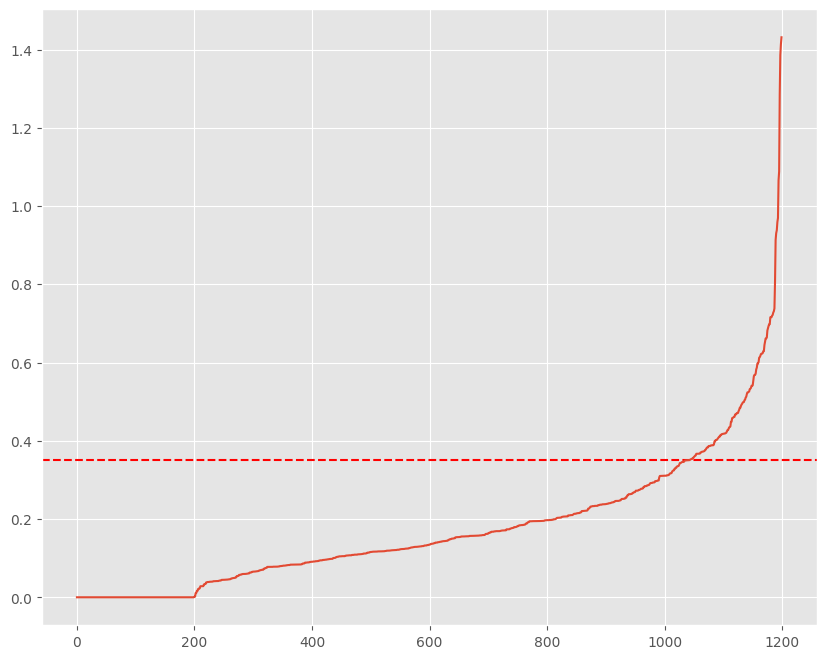

In [83]:
# Cargamos NeighborsNeighbors
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 6)
nbrs = neigh.fit(data_scaled)
distancias, indices = nbrs.kneighbors(data_scaled)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.351, color = 'r', linestyle = '--')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

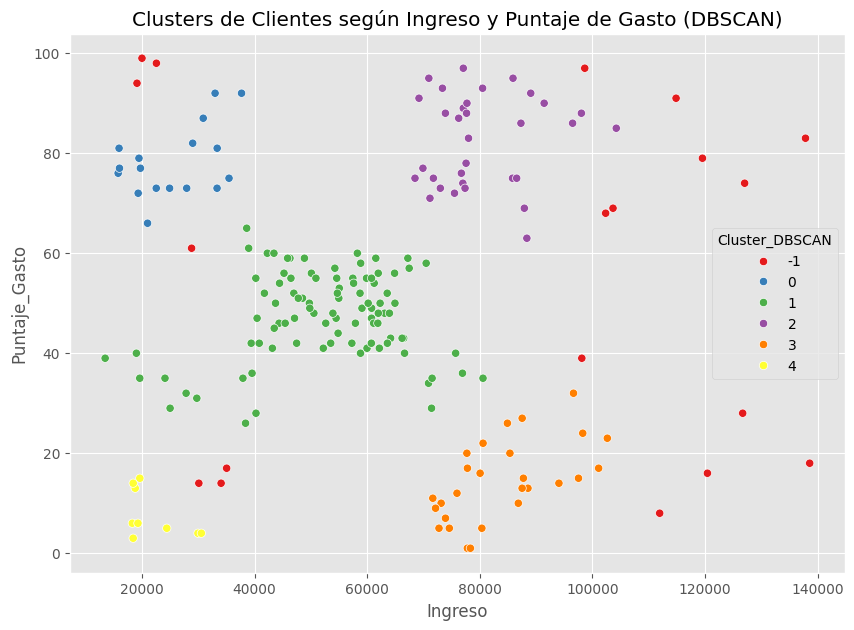

In [89]:
from sklearn.cluster import DBSCAN

# Retener las variables 'Ingreso' y 'Puntaje_Gasto'
data = dataset[['Ingreso', 'Puntaje_Gasto']]

# Estandarizar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Implementar DBSCAN
min_samples = 4
eps = 0.35

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Agregar los clusters al dataset
dataset['Cluster_DBSCAN'] = clusters

# Visualización de los clusters formados por DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Ingreso', y='Puntaje_Gasto', hue='Cluster_DBSCAN', data=dataset, palette='Set1')
plt.title('Clusters de Clientes según Ingreso y Puntaje de Gasto (DBSCAN)')
plt.show()

min_samples: Se estableció en 4. Esto se justifica con la regla práctica de utilizar min_samples = 2 * dim, donde dim es el número de dimensiones en el análisis (en este caso, 2: Ingreso y Puntaje_Gasto). Esto asegura que el algoritmo identifique como outliers aquellos puntos que no tengan al menos 3 vecinos cercanos en un radio determinado.

eps: El parámetro eps se fijó en 0.35, basado en la gráfica de la distancia k-vecinos más cercana (k-distance). Este valor se seleccionó observando el codo en la curva, donde las distancias comienzan a aumentar más rápidamente, lo que indica un cambio en la densidad local de los puntos.

### Cluster 0 (Azul)
Este grupo tiene clientes con ingresos de bajos a medios, generalmente entre 20,000 y 40,000, pero se destacan por tener puntajes de gasto elevados, que van de 60 a 100. Estos clientes son compradores comprometidos y representan un segmento valioso a pesar de sus ingresos limitados. Aunque tienen poco dinero, la estrategia de marketing debe centrarse en promociones y programas de lealtad para mantener y aumentar el compromiso con la tienda.

### Cluster 1 (Verde)
Los clientes de este grupo tienen ingresos medios que oscilan entre cuarenta y sesenta mil y un puntaje de gasto moderado que oscila entre cuarenta y sesenta mil. Aunque este grupo tiene un comportamiento de compra estable, es posible que aumenten la frecuencia de sus compras. Las estrategias de marketing deberían enfocarse en ofrecer incentivos como promociones por volumen o descuentos por compras frecuentes, lo que podría motivar a los clientes a aumentar su gasto y fidelidad a la tienda.


### Cluster 2 (Morado)
Este grupo incluye clientes con ingresos medios, que aún se encuentran en el rango de 40,000 a 60,000, pero que tienen un puntaje de gasto alto, que oscila entre 60 y 100. Estos clientes son valiosos para la tienda porque su comportamiento de gasto intensivo es similar al Cluster 0. La estrategia de marketing para este segmento debe incluir ofertas personalizadas y programas de recompensas para aumentar su nivel de gasto y mantener su alto valor.

### Cluster 3 (Naranja)
Los clientes de este grupo tienen ingresos medios-altos, aproximadamente 70,000, y puntajes de gasto moderados, entre 20 y 40. Este grupo posee una mayor capacidad de gasto que no ha sido explotada por completo. Las estrategias de marketing deben enfocarse en aumentar el ticket promedio de este grupo. Esto podría lograrse mediante programas que recompensen el gasto incremental o ofertas que promuevan compras de mayor valor.

### Cluster 4 (Amarillo)
Este grupo está formado por clientes con ingresos bajos, alrededor de 20,000, y un puntaje de gasto bajo, alrededor de 20. Dado su bajo nivel de gasto y poder adquisitivo limitado, este grupo podría no ser un objetivo prioritario para estrategias de marketing costosas. Sin embargo, podrían beneficiarse de ofertas promocionales simples que les brinden valor sin requerir un alto nivel de gasto, manteniéndolos comprometidos con la tienda tanto como puedan.

### Outliers (Rojo, Cluster -1)
DBSCAN puede encontrar clientes con comportamientos de compra inusuales o esporádicos. Los outliers no se agrupan en ninguna categoría. Dado que el comportamiento de estos clientes es difícil de predecir o segmentar, no deberían ser el foco principal de la estrategia de marketing. Sin embargo, podrían analizarse individualmente para comprender mejor sus patrones de compra y determinar si existe alguna táctica específica que pueda usarse para este grupo heterogéneo.

La principal diferencia entre el agrupamiento jerárquico y DBSCAN es cómo manejan los puntos irregulares. DBSCAN es particularmente útil para identificar estas excepciones, lo que podría ayudar a mejorar el enfoque de las estrategias de marketing al eliminar a estos clientes de las campañas más costosas.


### Cambios en la Estrategia:

- Los grupos principales: Los grupos que muestran comportamientos similares al análisis jerárquico (como los grupos 0 y 2 de DBSCAN) seguirían siendo el foco principal de la estrategia de marketing.

- Inclusión de Outliers: Podrías considerar incluir los outliers en las campañas de marketing dirigidas o realizar un análisis más profundo para descubrir por qué estos clientes no se corresponden bien con otros.

- Ajuste en ofertas: Para hacer que los recursos de marketing se utilicen de manera eficiente, podrías ajustar las ofertas y las comunicaciones para que sean más precisas al tomar en cuenta las diferencias en los clusters identificadas por DBSCAN.


### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

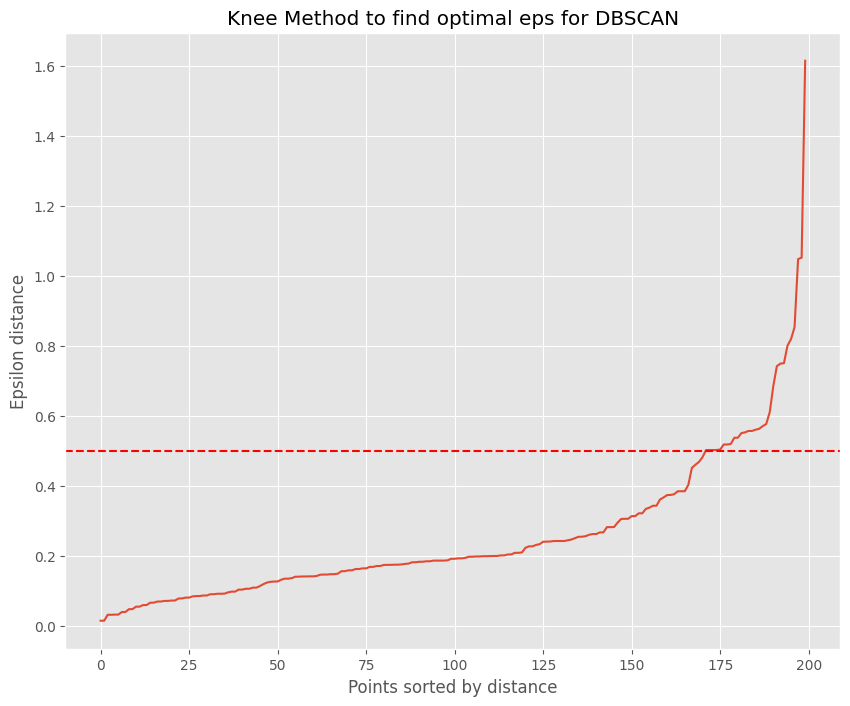

eps encontrado: 0.5027183294296265


In [130]:
from gower import gower_matrix

# # Convertir en strings
# dataset['Genero'] = dataset['Genero'].astype(str)


# # Escalar las variables numéricas
# scaler = StandardScaler()
# dataset[['Ingreso', 'Puntaje_Gasto']] = scaler.fit_transform(dataset[['Ingreso', 'Puntaje_Gasto']])

# Retener las variables escaladas 'Ingreso', 'Puntaje_Gasto', 'Género', y 'Grupo_Etario'
dataset['Grupo_Etario_str'] = dataset['Grupo_Etario'].astype(str)
data = dataset[['Ingreso', 'Puntaje_Gasto', 'Genero', 'Grupo_Etario_str']]

# Calcular la matriz de distancia de Gower
gower_dist = gower_matrix(data)

# Implementar NearestNeighbors utilizando la matriz de distancia precomputada
neigh = NearestNeighbors(n_neighbors=6,)
nbrs = neigh.fit(gower_dist)
distancias, indices = nbrs.kneighbors(gower_dist)

# Ordenar las distancias para la gráfica de codo
distancias = np.sort(distancias[:, 1], axis=0)

# Graficar la distancia k-vecinos más cercana
fig = plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.plot(distancias)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.title('Knee Method to find optimal eps for DBSCAN')
plt.show()

# Identificar el "codo" en la gráfica
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(f"eps encontrado: {distancias[knee.knee]}")

In [132]:
# Implementar DBSCAN usando la distancia de Gower
min_samples = 8
eps = 0.50

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(gower_dist)

# Agregar los clusters al dataset
dataset['Cluster_DBSCAN_Gower'] = clusters

# Descripción de los grupos encontrados
cluster_summary = dataset.groupby('Cluster_DBSCAN_Gower').agg({
    'Ingreso': ['mean', 'median', 'std'],
    'Puntaje_Gasto': ['mean', 'median', 'std'],
    'Genero': lambda x: x.mode()[0],  # La moda para variables categóricas
    'Grupo_Etario': lambda x: x.mode()[0],
    'Id_Cliente': 'count'
}).rename(columns={'Id_Cliente': 'Count'})

display(cluster_summary)

Ingreso                     Puntaje_Gasto            \
                          mean    median       std          mean    median   
Cluster_DBSCAN_Gower                                                         
-1                   -0.024078  0.004929  1.093578     -0.115034 -0.085407   
 0                   -0.472661 -0.618133  0.446383     -0.039527 -0.124229   
 1                    0.815979  0.646325  0.388649      1.252642  1.389812   
 2                   -0.017174  0.041024  0.158239     -0.012617  0.031057   
 3                   -0.231654 -0.217195  0.377035     -0.054905 -0.104818   

                                 Genero Grupo_Etario Count  
                           std <lambda>     <lambda> count  
Cluster_DBSCAN_Gower                                        
-1                    1.064099   Hombre        35-44   152  
 0                    0.316732    Mujer        25-34    11  
 1                    0.318400    Mujer        25-34    15  
 2                    0.228673    Mujer        18-24     8  
 3                    0.219174    Mujer        45-54    14

### Variables demográficas en la estrategia de marketing

La inclusión de las variables "Género" y "Grupo_Etario" en el análisis de segmentación con DBSCAN ha mejorado la comprensión de las características de los distintos grupos de clientes. La base sólida para enfocar de manera más precisa las estrategias de marketing se encuentra en esta segmentación más detallada.

Cluster -1 (Outliers): Este grupo tiene clientes que no se agrupan bien con los demás y tienen una alta variabilidad en ingresos y puntaje de gasto. La mayoría de ellos son hombres de 35 a 44 años. No sería rentable enfocar una estrategia de marketing específica en este grupo debido a su diversidad y comportamiento peculiar. Sin embargo, realizar un análisis individual de estos clientes podría ser útil para identificar patrones inusuales que podrían ofrecer insights útiles.

El Cluster 0 está principalmente compuesto por mujeres de 25 a 34 años con ingresos bajos y puntajes de gasto bajos. Este grupo podría beneficiarse de estrategias de marketing que ofrezcan bienes y servicios a precios razonables mientras se enfatiza el valor por el dinero. Las promociones y descuentos diseñadas para maximizar el ahorro serían especialmente útiles para este mercado.

El Clúster 1 es particularmente valioso, compuesto por mujeres de 25 a 34 años con ingresos altos y puntajes de gasto altos. Estos clientes son un grupo importante para la tienda, por lo que la estrategia de marketing debe centrarse en ofrecer productos premium, servicios exclusivos y programas de fidelización para mantener su lealtad y aumentar su nivel de gasto.

Cluster 2, este grupo está formado por mujeres jóvenes de 18 a 24 años con ingresos y puntajes de gasto moderados. Este grupo podría ser particularmente sensible a las campañas y promociones que enfocan los esfuerzos en productos accesibles pero enfocados en la moda, la tecnología y otros productos que son populares entre el público juvenil. Podrían tener éxito estrategias que resalten las tendencias más recientes y ofrezcan buenas ofertas en productos que sean relevantes para este grupo.

El Clúster 3 está compuesto por mujeres con ingresos y puntajes de gasto bajos a moderados. Las estrategias de marketing para este grupo deberían enfocarse en ofertas y promociones que enfaticen el ahorro, especialmente en productos de uso cotidiano o esenciales. Este método puede aumentar su participación en la tienda.

La incorporación de las variables "género" y "grupo etario" ha sido crucial para mejorar la concentración de la estrategia de marketing. Ahora, las campañas pueden enfocarse en el poder adquisitivo y el comportamiento de gasto, así como en variables demográficas importantes que permiten una segmentación más precisa. Esto facilita la creación de estrategias de marketing más efectivas que se adapten a las necesidades y preferencias únicas de cada cliente, maximizando el retorno de la inversión.